torch.Size([28, 28])


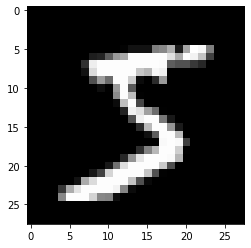

In [2]:
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt

import torch
from torchvision import transforms
from torchvision.datasets import MNIST

# the data is already normalized, no need to transform further...
digits = MNIST('data', train=True, download=False, 
               transform=transforms.ToTensor())

display = plt.imshow(digits[0][0][0])
display.set_cmap('gray')
print(digits[0][0][0].shape)

tensor([[0.9412, 0.9922, 0.9922, 0.4667],
        [0.1765, 0.7294, 0.9922, 0.9922],
        [0.0000, 0.0627, 0.3647, 0.9882],
        [0.0000, 0.0000, 0.0000, 0.9765]])


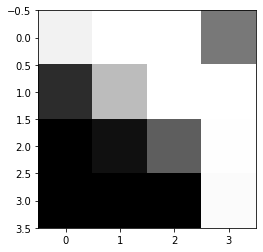

In [3]:
# grab 4x4 squares of the image
im1 = digits[0][0][0]

stride = 1
mat_sq = torch.zeros([28,28,4,4])

for i in range(0, len(im1)-4, stride):
    for j in range(0, len(im1[i])-4, stride):
        cube = im1[i:i+4, j:j+4]
        mat_sq[i, j] = cube
        
# creates a 2d collection of matrices, where each [i, j] index contains a 4x4 matrix 
print(mat_sq[14, 14])
display = plt.imshow(mat_sq[14, 14])
display.set_cmap('gray')

tensor([[ 0.2364, -0.0946,  0.3430,  0.9041],
        [-0.3620, -0.3891,  0.8085, -0.2528],
        [ 0.8348,  0.2210,  0.3747, -0.3373],
        [ 0.3407, -0.8893, -0.2972, -0.0694]])
tensor([[ 1.0000e+00,  1.4901e-08,  5.9605e-08,  1.4901e-07],
        [ 1.4901e-08,  1.0000e+00, -5.2154e-08, -5.5879e-08],
        [ 5.9605e-08, -5.2154e-08,  1.0000e+00, -1.5646e-07],
        [ 1.4901e-07, -5.5879e-08, -1.5646e-07,  1.0000e+00]])


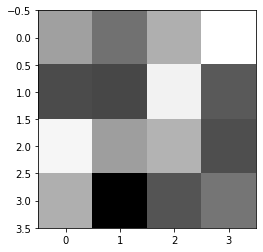

In [4]:
# find SVD of each submatrix, make unitary and assign to uni
uni = torch.zeros([28,28,4,4])

for i in range(len(mat_sq)):
    for j in range(len(mat_sq[i])):
        U, S, VT = torch.svd(mat_sq[i, j])
        uni[i, j] = torch.matmul(U, VT)
        #print(f"U =\n{U}\n S =\n{S}\n VT=\n{VT}\n")

test = uni[14,14]
test_uni = torch.matmul(test, test.transpose(0, 1))
# checking unitary-ness..
print(uni[14, 14], test_uni, sep='\n')
display = plt.imshow(test)
display.set_cmap('gray')

In [ ]:
# try graham schmidt
test_uni = torch.zeros(4, 4)
for i in range(len(test)):
    for j in range(len(test[i])):
        if i == 0:
            test_uni[i, j] = test[i, j]
        else:
            tes_uni[i, j] = test[i][j]
            for a in range(j, 0, -1)
                test_uni[i, j] -= test_uni[i]